In [1]:
import scipy.io as sio
import dotenv
import os
import numpy as np

from util import plot_barcode

dotenv.load_dotenv()

INPUT_FOLDER = os.getenv("INPUT_FOLDER")

# Bilateral

ECoG shape: (1024398, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 2671.98
ECoG mean: 0.08538006834257779
ECoG std: 260.8560070736566


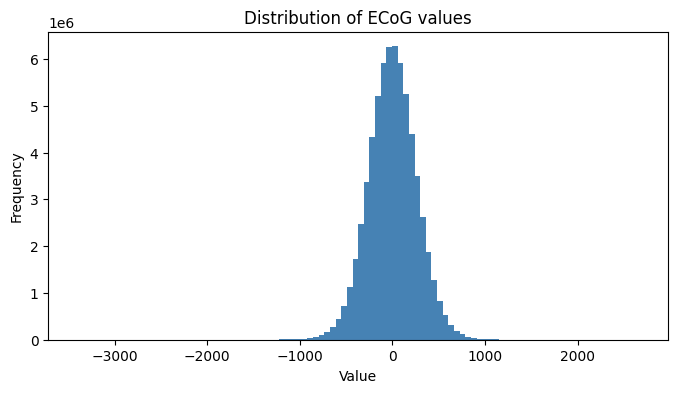

In [2]:
data = sio.loadmat(f"{INPUT_FOLDER}/CRCNS/Bilateral/2018-07-12_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [3]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


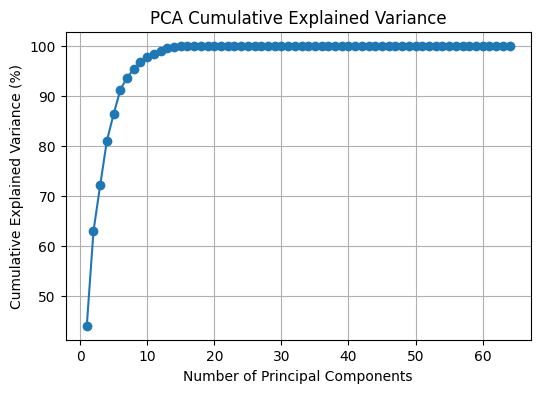

Explained variance by first 6 PCs: 0.9120788142345502


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


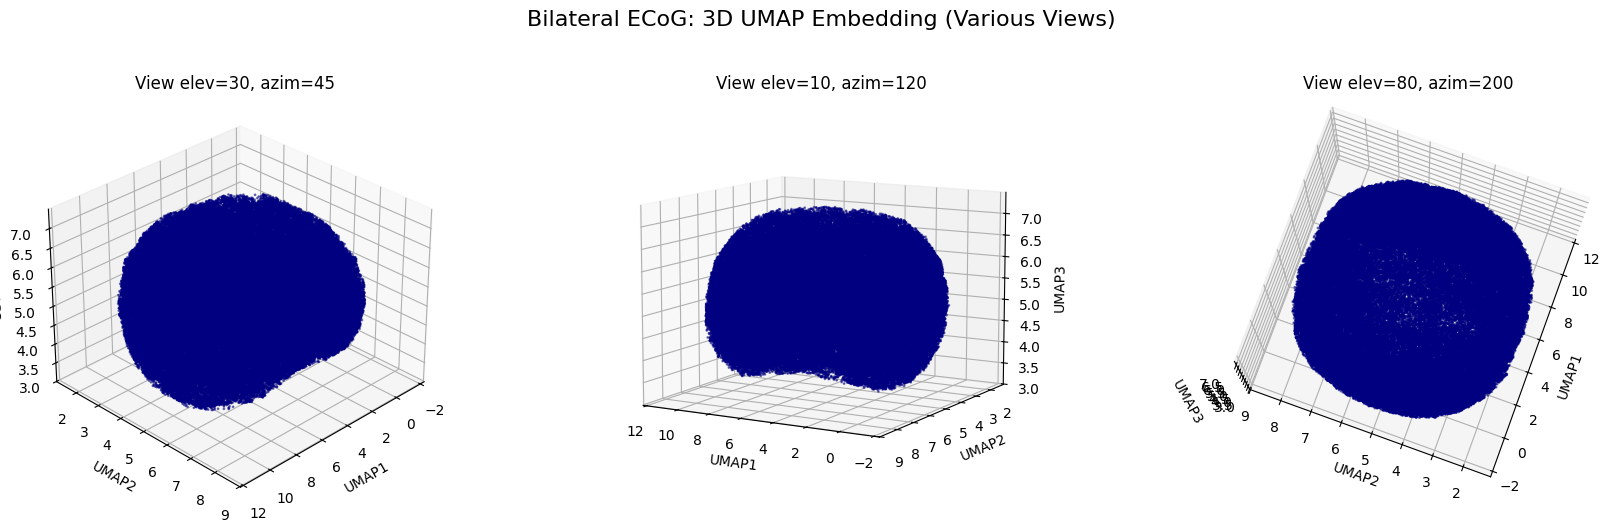

In [ ]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA with enough components to explain >99% variance, and plot cumulative explained variance
pca_full = PCA(n_components=min(X.shape[0], X.shape[1]))
X_pca_full = pca_full.fit_transform(X)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Bilateral PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()


# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap

umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Bilateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    
    ax = fig.add_subplot(1, len(angles), i + 1, projection="3d")
    ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], s=1, c="navy", alpha=0.5)
    ax.set_title(f"View elev={elev}, azim={azim}")
    ax.set_xlabel("UMAP1")
    ax.set_ylabel("UMAP2")
    ax.set_zlabel("UMAP3")
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


(1025, 3)


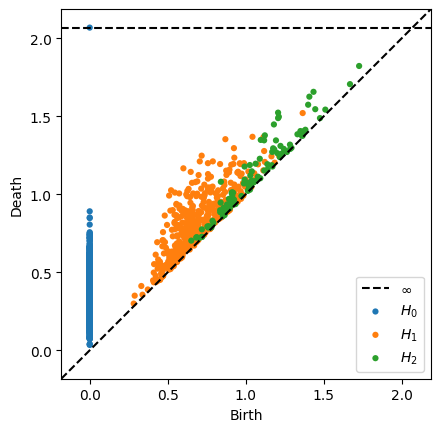

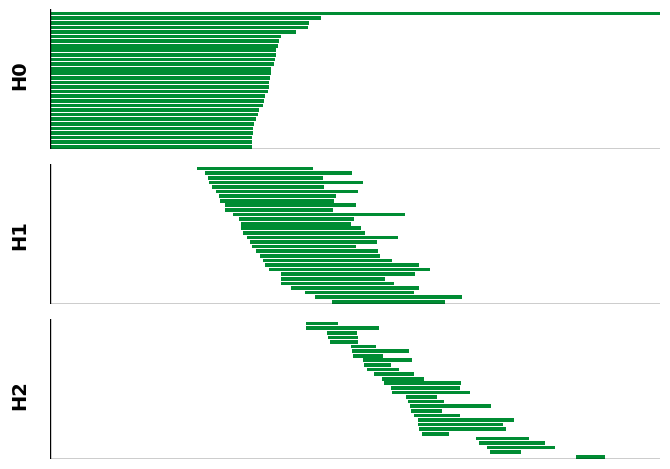

In [5]:
from ripser import ripser
from persim import plot_diagrams

data = X_umap[::100]

print(data.shape)
maxdim = 2
diagrams = ripser(data, maxdim=maxdim)["dgms"]

# Show both persistence diagrams and barcodes (lifetimes)
plot_diagrams(diagrams, show=True)
plot_barcode(diagrams)

plt.tight_layout()
plt.show()

# Contralateral

ECoG shape: (907298, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 2355.21
ECoG mean: 0.6554025494862218
ECoG std: 276.6185245184147


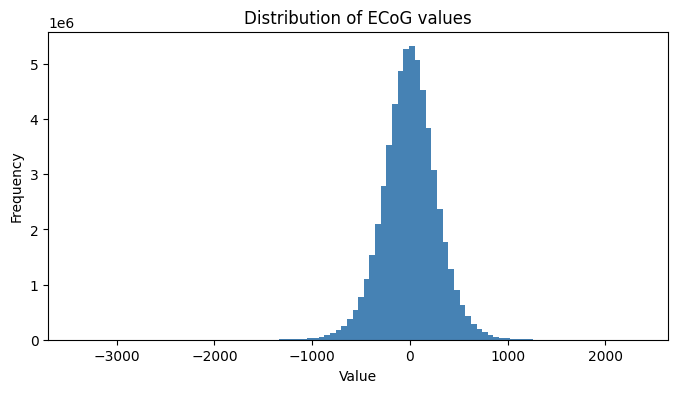

In [6]:
data = sio.loadmat(f"{INPUT_FOLDER}/CRCNS/Contralateral/2018-03-15_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

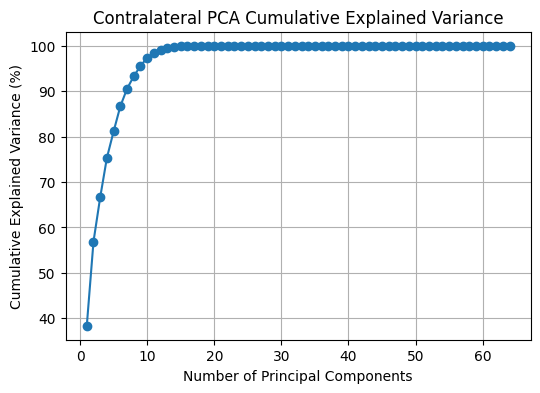

Explained variance by first 6 PCs: 0.8667281424110854


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


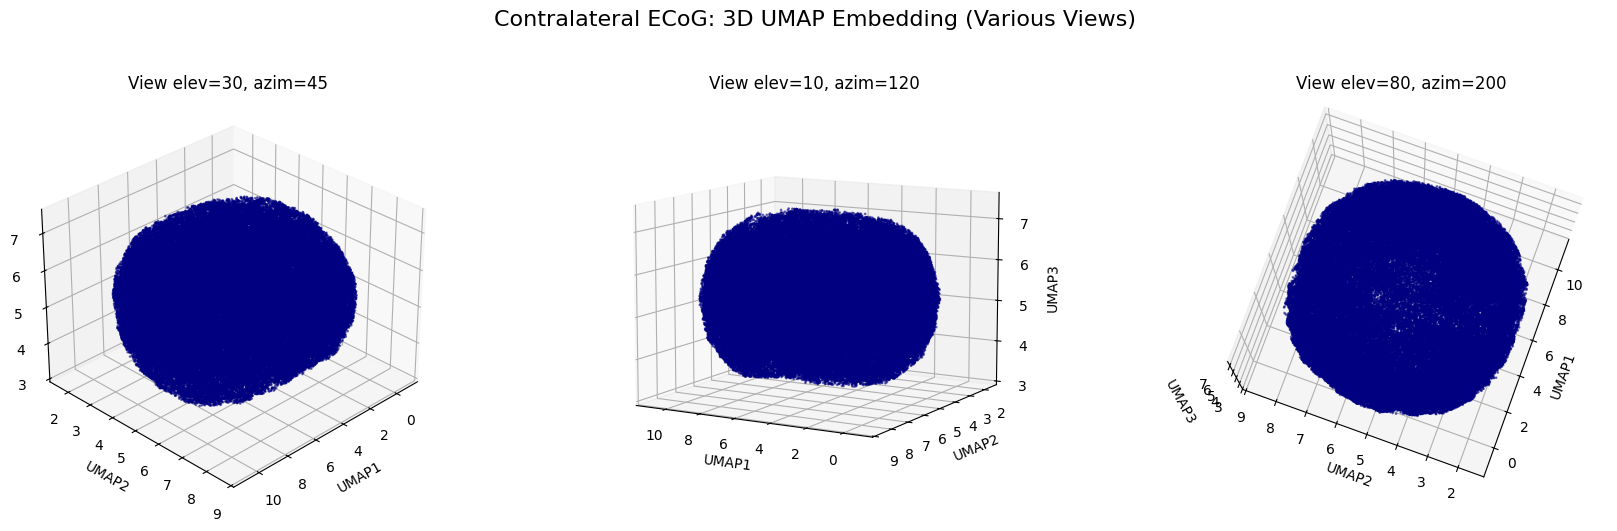

In [8]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA with enough components to explain >99% variance, and plot cumulative explained variance
pca_full = PCA(n_components=min(X.shape[0], X.shape[1]))
X_pca_full = pca_full.fit_transform(X)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Contralateral PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Apply PCA, retain first 6 principal components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)  # shape: (n_samples, 6)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Contralateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


(908, 3)


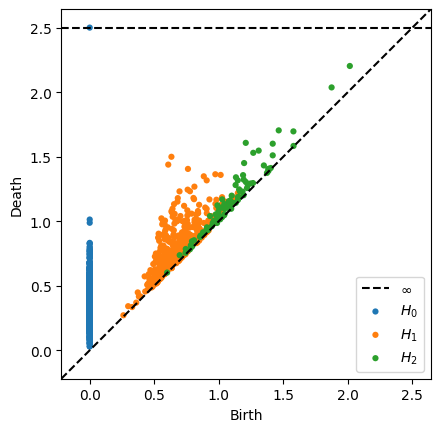

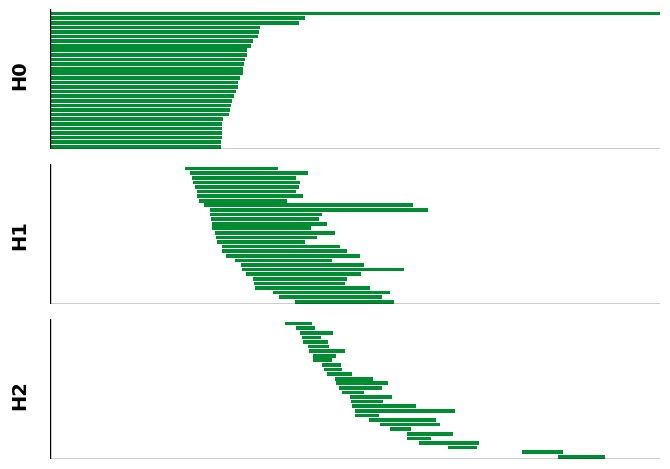

In [9]:
from ripser import ripser
from persim import plot_diagrams

data = X_umap[::100]

print(data.shape)
maxdim = 2
diagrams = ripser(data, maxdim=maxdim)["dgms"]

# Show both persistence diagrams and barcodes (lifetimes)
plot_diagrams(diagrams, show=True)
plot_barcode(diagrams)

plt.tight_layout()
plt.show()

# Ipsilateral

ECoG shape: (920498, 64)
ECoG dtype: float64
ECoG min: -3413.33
ECoG max: 3413.23
ECoG mean: 0.6948211671155179
ECoG std: 943.3876852401362


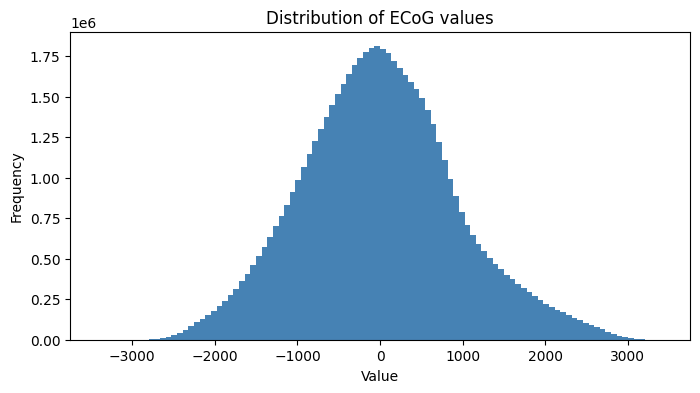

In [10]:
data = sio.loadmat(f"{INPUT_FOLDER}/CRCNS/Ipsilateral/2018-04-29_(S1)/ECoG.mat")

# Concatenate all ecog arrays along the time/sample axis
ecog = data["ECoG"]
time = data["ECoG_time"] 
print("ECoG shape:", ecog.shape)
print("ECoG dtype:", ecog.dtype)
print("ECoG min:", np.min(ecog))
print("ECoG max:", np.max(ecog))
print("ECoG mean:", np.mean(ecog))
print("ECoG std:", np.std(ecog))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(ecog.flatten(), bins=100, color="steelblue")
plt.title("Distribution of ECoG values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [11]:
from scipy.signal import butter, filtfilt

ecog = data["ECoG"]
time = data["ECoG_time"]
fs = float(data["Fs"].squeeze())  # Sampling frequency

# Band-pass filter design (1-100 Hz)
lowcut = 1.0
highcut = 100.0
order = 4
nyq = fs / 2
b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')

# Apply filter to each channel (axis 1: samples)
ecog_filtered = filtfilt(b, a, ecog, axis=1)

# Z-score normalization of each channel (over time/samples)
ecog_zscored = (ecog_filtered - np.mean(ecog_filtered, axis=1, keepdims=True)) / np.std(ecog_filtered, axis=1, keepdims=True)

# Replace ecog with z-scored, filtered version for subsequent use
ecog = ecog_zscored

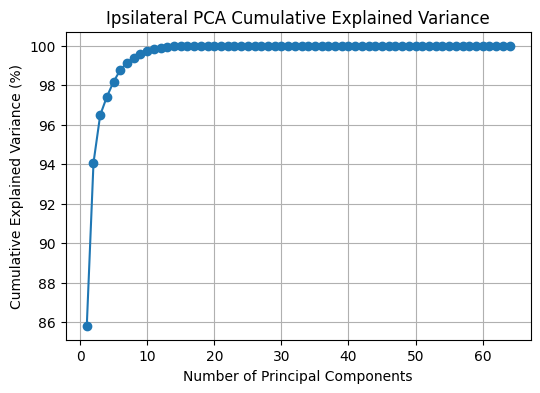

Explained variance by first 6 PCs: 0.9877586380400344


/Users/emil/Desktop/assignments/TDA/assignment2/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


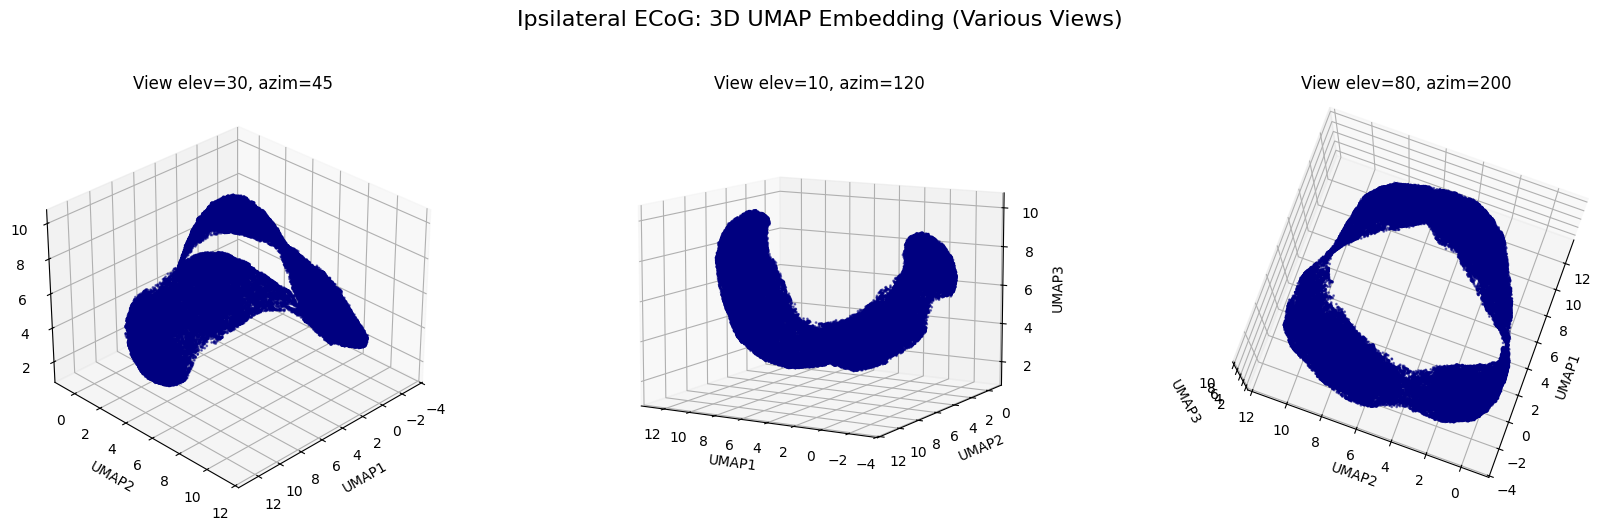

In [12]:
from sklearn.decomposition import PCA
import umap

# ecog shape: (n_channels, n_samples)
# We'll treat time (samples) as data points and channels as features for PCA.
# So, transpose to (n_samples, n_channels)
X = ecog

# Apply PCA with enough components to explain >99% variance, and plot cumulative explained variance
pca_full = PCA(n_components=min(X.shape[0], X.shape[1]))
X_pca_full = pca_full.fit_transform(X)
explained_var = pca_full.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var)*100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Ipsilateral PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()

# For downstream steps, keep only first 6 components as before
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

print("Explained variance by first 6 PCs:", np.sum(pca.explained_variance_ratio_))

# Now reduce to 3D with UMAP for visualization
import umap
umap_reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_reducer.fit_transform(X_pca[::10])  # shape: (n_samples, 3)

# Plot 3D UMAP embedding from multiple angles to view geometry better
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 5))
angles = [(30, 45), (10, 120), (80, 200)]  # List of (elev, azim)

fig.suptitle("Ipsilateral ECoG: 3D UMAP Embedding (Various Views)", fontsize=16, y=1.03)
for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, len(angles), i+1, projection='3d')
    ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=1, c='navy', alpha=0.5)
    ax.set_title(f'View elev={elev}, azim={azim}')
    ax.set_xlabel('UMAP1'); ax.set_ylabel('UMAP2'); ax.set_zlabel('UMAP3')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()


(921, 3)


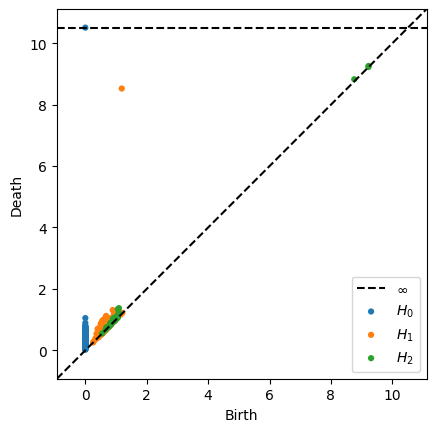

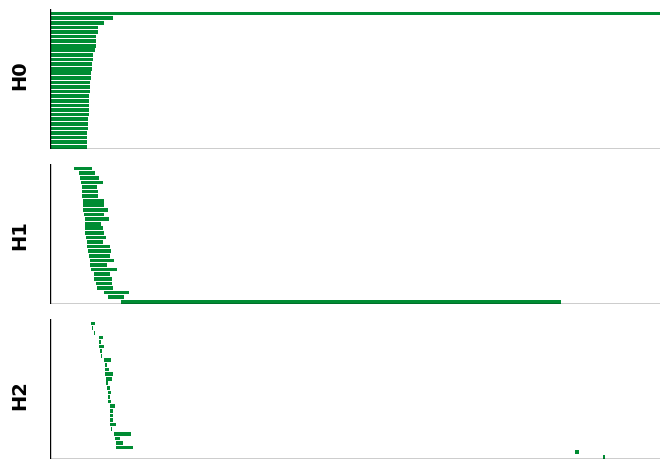

In [13]:
from ripser import ripser
from persim import plot_diagrams

data = X_umap[::100]

print(data.shape)
maxdim = 2
diagrams = ripser(data, maxdim=maxdim)["dgms"]

# Show both persistence diagrams and barcodes (lifetimes)
plot_diagrams(diagrams, show=True)
plot_barcode(diagrams)

plt.tight_layout()
plt.show()